# LetsGrowMore (LGMVIP) - May 2022

## A.GOWTHAMI - Data Science Intern

## BEGINNER LEVEL TASK

## Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

DATASET LINK : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## 1. IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 2. IMPORTING THE DATASET

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

## 3. ANALYSIS

In [3]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:
data.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data.shape

(2035, 8)

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


#### PICKING UP CLOSE COLUMN

In [10]:
data1 = data.reset_index()['Close']

In [11]:
data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [12]:
data1.shape

(2035,)

#### VISUALIZING

Text(0, 0.5, 'Y-axis')

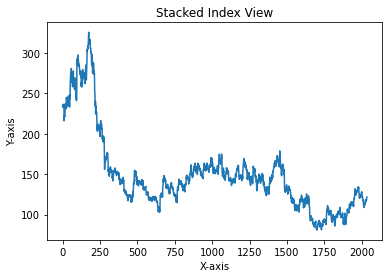

In [13]:
plt.plot(data1)
plt.title("Stacked Index View")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

### MIN-MAX SCALER

LSTM are sensitive to the scale of the data, so using Min-Max scaler to transform the values from 0 to 1. So in order to do that we need to reshape so that we can fit transform

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

Now the data1 is transformed into an array and it now having the values between zero to one


In [16]:
data1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [17]:
data1.shape

(2035, 1)

### TRAIN TEST SPLIT

 Since we are going to train the Time series data so one data is dependent on other data therefore the training size should be 65% of the total length of the data frame whereas the test size should be the difference between the length of the dataset and the training size

In [18]:
train_size = int(len(data1)*0.65)
test_size = len(data1) - train_size
train_data, test_data = data1[0:train_size,:],data1[train_size:len(data1),:1]

In [19]:
train_size,test_size

(1322, 713)

In [20]:
train_data,test_data

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.25347222],
        [0.26041667],
        [0.2563317 ]]),
 array([[0.24652778],
        [0.23611111],
        [0.25204248],
        [0.25919118],
        [0.25776144],
        [0.2681781 ],
        [0.25449346],
        [0.27103758],
        [0.24530229],
        [0.26756536],
        [0.27267157],
        [0.26633987],
        [0.27410131],
        [0.28615196],
        [0.27818627],
        [0.27205882],
        [0.27124183],
        [0.27798203],
        [0.27083333],
        [0.25857843],
        [0.24285131],
        [0.2250817 ],
        [0.23447712],
        [0.24346405],
        [0.23611111],
        [0.22937092],
        [0.21527778],
        [0.20976307],
        [0.20751634],
        [0.2060866 ],
        [0.20445261],
        [0.20098039],
        [0.21180556],
        [0.19301471],
        [0.18974673],
        [0.20302288],
        [0.21752451],
        [0.20629085],
        [0.191584

### DATA PREPROCESSING

Now, Splitting the data into x and y, the timestep value will be 100. In the 0th iteration the first 100 records will goes as first record and the 101 elements will be in the x. The 100 elements will be in the y

converting an array of values into a dataset matrix

In [21]:
def create_data(dataset,time_step =  1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
time_step  = 100
X_train, y_train = create_data(train_data,time_step)
X_test,y_test = create_data(test_data,time_step)

In [23]:
X_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.34517974, 0.31781046, 0.33047386, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.31781046, 0.33047386, 0.32128268, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.33047386, 0.32128268, 0.34007353, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [24]:
X_train.shape,y_train.shape

((1221, 100), (1221,))

In [25]:
X_test.shape,y_test.shape

((612, 100), (612,))

Before implementing the LSTM, we should always reshape our X_train in 3D and add 1, the reason behind it is the time step and the 1 is given to the LSTM

In [26]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

### STACKED LSTM

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 6s 145ms/step - loss: 0.0292 - val_loss: 0.0040
Epoch 2/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 3/100
20/20 [==============================] - 2s 103ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 4/100
20/20 [==============================] - 2s 103ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 5/100
20/20 [==============================] - 2s 104ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/100
20/20 [==============================] - 2s 104ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 2s 104ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 8/100
20/20 [==============================] - 2s 103ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 2s 103ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 2s 102ms/step - loss: 0.0013 - val_lo

### PREDICTION

Now predicting the x_train and y_train, and in order to see the root mean squared performance lets scaler inverse transform

In [31]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [32]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculating root_mean_square performance metrics

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

167.5817537186368

Testing data root_mean_square

In [34]:
math.sqrt(mean_squared_error(y_test,test_predict))

116.68439314956946

### PLOTTING

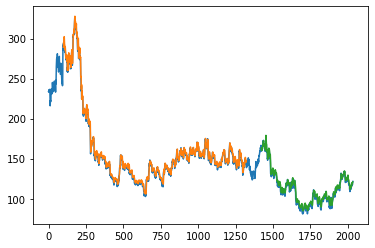

In [35]:
look_back = 100

# shift train prediction 

trainPredict = np.empty_like(data1)
trainPredict[:,:] = np.nan
trainPredict[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction

testPredict = np.empty_like(data1)
testPredict[:,:] = np.nan
testPredict[len(train_predict) + (look_back * 2)+1:len(data1)-1, :] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()